# Visualization of the Loss Function for Logistic Regression

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
df = pd.read_csv('data/all_penguins_clean.csv')
df = df.loc[df['Species'] != 'Chinstrap', ['Species', 'Culmen Length (mm)']]
df = df.dropna()
df.head()

,Species,Culmen Length (mm)
0,Adelie,39.1
1,Adelie,39.5
2,Adelie,40.3
4,Adelie,36.7
5,Adelie,39.3


In [6]:
X = df[['Culmen Length (mm)']]
y = df['Species']

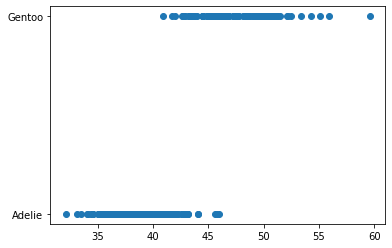

In [8]:
plt.scatter(X['Culmen Length (mm)'], y)
plt.gcf().set_facecolor('white')

In [9]:
from sklearn.linear_model import LogisticRegression
# convert y to 0,1
y = (y == 'Gentoo').astype(int)

# scale the X values to have sd of 1 and mean of range 0,1
X = (X - X.mean())/X.std()

# check out the optimal solution (minimum of the loss function)
m = LogisticRegression(penalty='none').fit(X, y)
print(f'Bias/ w0: {m.intercept_}')
print(f'Feature Weight/ w1: {m.coef_}')

Bias/ w0: [-0.56139055]
Feature Weight/ w1: [[6.30858034]]


In [10]:
def sigmoid(a):
    return 1/(1+np.exp(-a))

In [11]:
def predict(w0, w1, x):
    return sigmoid(w0+w1*x)    

In [12]:
def log_loss(y, pred):
    return -np.mean(y*np.log(pred) + (1-y)*np.log(1-pred))

In [14]:
# define a parameter grid for w1 and w2
w0 = np.linspace(-1, 0, 50)
w1 = np.linspace(5, 8, 50)

losses = []

# for every combination of w1 and w2 calculate the log loss
for i in w0:
    for j in w1:
        ypred = predict(i, j, X['Culmen Length (mm)'])
        losses.append(log_loss(y, ypred))

# transform the list into a two dimensional grid
losses = np.array(losses).reshape((len(w0), len(w1)), order='F')

In [15]:
fig = go.Figure(data=[go.Surface(x=w0, y=w1, z=losses, colorscale="ice", cmin=0, cmax=losses.max())])

fig.update_layout(
    autosize=True,
    scene=dict(
        zaxis_title='Log Loss',
        yaxis_title='w1',
        xaxis_title='w0'
    ),
    title=dict(
        text="Log Loss of a Logistic Regression with 2 Paramaters",
        font=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig.write_html("ml.html", 
               include_plotlyjs='cdn',
               full_html=False,
               default_height='700px', 
               config=dict(displayModeBar=False)
)